# Project - Loan Application MLP Model

# Data Preparation and pre-processing

In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
train_ds = pd.read_excel('/content/drive/MyDrive/Adv. Ai by Sundaram- 9th Sep 2023/10th Sep 2023/Loan_Application.xlsx')
train_ds.head()

,ID,Decision,Selfcon_Code,Tier_1,Tier_2,AccoClass,LoanType,Gender,Etype,Doc_pf,...,Term,Dwnpay,BankSave,CalcEmi,IIR,IAR,FOIR,LTV,LVR,dwnp_prop_p
0,1,0,1,0,0,0,1,0,1,0,...,84,300000,0,4087.159912,7.999922,11.000000,22.300176,40.000000,40.0,60.000000
1,2,0,1,0,0,0,1,0,0,1,...,180,130000,0,4924.810059,21.999509,38.999129,32.858975,71.000036,71.0,28.888889
2,3,1,1,0,0,0,0,0,1,1,...,84,557000,0,11712.969727,36.000030,56.000047,36.000030,17.999999,47.0,52.696310
3,4,1,1,0,0,1,1,0,1,1,...,180,666500,0,15390.040039,36.999736,52.999656,36.999736,56.000009,60.0,39.993999
4,5,1,1,0,0,0,1,0,1,1,...,180,151000,0,15390.040039,40.999654,57.000148,40.999654,51.000008,87.0,13.119027


In [ ]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1570 non-null   int64  
 1   Decision      1570 non-null   int64  
 2   Selfcon_Code  1570 non-null   int64  
 3   Tier_1        1570 non-null   int64  
 4   Tier_2        1570 non-null   int64  
 5   AccoClass     1570 non-null   int64  
 6   LoanType      1570 non-null   int64  
 7   Gender        1570 non-null   int64  
 8   Etype         1570 non-null   int64  
 9   Doc_pf        1570 non-null   int64  
 10  Marstat       1570 non-null   int64  
 11  Emp_Type_1    1570 non-null   int64  
 12  Emp_Type_2    1570 non-null   int64  
 13  Emp_Type_3    1570 non-null   int64  
 14  Educlass_2    1570 non-null   int64  
 15  Educlass_1    1570 non-null   int64  
 16  Oriclass_1    1570 non-null   int64  
 17  Oriclass_2    1570 non-null   int64  
 18  eom_25        1570 non-null 

In [ ]:
# Setting up Independent and Dependent variable
x = train_ds.iloc[:,2:]
y = train_ds.iloc[:,1] # Dep variable - "Decision"

In [ ]:
y.value_counts()

1    1255
0     315
Name: Decision, dtype: int64

In [ ]:
315/(1255+315)*100

20.063694267515924

In [ ]:
x.head(2)

,Selfcon_Code,Tier_1,Tier_2,AccoClass,LoanType,Gender,Etype,Doc_pf,Marstat,Emp_Type_1,...,Term,Dwnpay,BankSave,CalcEmi,IIR,IAR,FOIR,LTV,LVR,dwnp_prop_p
0,1,0,0,0,1,0,1,0,1,1,...,84,300000,0,4087.159912,7.999922,11.000000,22.300176,40.000000,40.0,60.000000
1,1,0,0,0,1,0,0,1,1,0,...,180,130000,0,4924.810059,21.999509,38.999129,32.858975,71.000036,71.0,28.888889


In [ ]:
num_inputs = x.shape[1]
print("Total no of independent variable : {}".format(num_inputs))

Total no of independent variable : 36


In [ ]:
# Split the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
x_train.shape

(1256, 36)

# Please note - Feature Scaling is Mandatory in Deep Neural Network

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)

In [ ]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.192768,-0.696156,-0.761495,-0.970189,0.277825,-0.305163,0.921835,-0.604332,0.328000,0.979509,...,0.533285,0.634178,-0.174014,-0.119952,-0.630528,-0.864033,-0.784048,-0.750035,-0.594775,0.849991
1,0.192768,-0.696156,1.313207,-0.970189,0.277825,-0.305163,-1.084793,1.654719,-3.048784,-1.020919,...,0.533285,-0.273340,-0.174014,-0.542250,0.965971,-0.491625,0.801671,0.524279,-0.027202,0.044289
2,0.192768,-0.696156,1.313207,-0.970189,0.277825,-0.305163,0.921835,-0.604332,0.328000,0.979509,...,0.533285,-0.211863,-0.174014,1.569233,0.590249,-0.165831,0.428486,0.831875,0.540370,-0.742947
3,0.192768,-0.696156,1.313207,1.030727,0.277825,-0.305163,0.921835,-0.604332,0.328000,0.979509,...,0.533285,-0.425569,-0.174014,-1.293939,-0.536723,0.159907,-0.690876,0.787935,-0.245499,0.395345
4,0.192768,1.436459,-0.761495,1.030727,0.277825,-0.305163,0.921835,1.654719,0.328000,0.979509,...,0.533285,0.048682,-0.174014,0.724639,-1.475750,0.904912,2.478676,0.436396,-2.777746,-0.160334


In [ ]:
pd.DataFrame(x_valid).head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.192768,1.436459,-0.761495,-0.970189,0.277825,-0.305163,-1.084793,1.654719,0.328,-1.020919,...,-1.083042,-0.829562,-0.143477,0.684525,1.518072,0.149652,1.350044,1.677233,1.380294,-1.423241
1,0.192768,-0.696156,-0.761495,-0.970189,0.277825,-0.305163,0.921835,-0.604332,0.328,0.979509,...,0.533285,-0.244066,-0.174014,1.146938,0.120729,0.625513,0.988203,0.040920,-0.245499,-0.665497
2,0.192768,-0.696156,-0.761495,1.030727,0.277825,-0.305163,0.921835,-0.604332,0.328,0.979509,...,0.533285,-0.829562,-0.174014,-0.964545,-0.818380,-0.910574,-0.970632,1.007642,0.715008,-0.968594
3,0.192768,-0.696156,1.313207,1.030727,0.277825,-0.305163,0.921835,-0.604332,0.328,0.979509,...,0.533285,1.690999,-0.174014,0.302344,1.153674,1.137452,0.988106,-0.530326,-0.944050,1.326261
4,0.192768,-0.696156,1.313207,1.030727,0.277825,-0.305163,0.921835,-0.604332,0.328,0.979509,...,0.533285,-0.536814,-0.174014,0.302344,-0.160983,0.206634,-0.317674,-1.013687,0.627689,-0.833884


# Model Building

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()
# Hidden Layer
classifier.add(Dense(input_dim=num_inputs, activation='relu', units=50))
# output layer
classifier.add(Dense(activation='sigmoid', units=1))
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                1850      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1901 (7.43 KB)
Trainable params: 1901 (7.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist = classifier.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=32, epochs=100)

Epoch 1/100
40/40 [==============================] - 1s 8ms/step - loss: 0.7007 - accuracy: 0.5645 - val_loss: 0.5235 - val_accuracy: 0.7643
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4928 - accuracy: 0.7858 - val_loss: 0.4523 - val_accuracy: 0.7930
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4367 - accuracy: 0.8145 - val_loss: 0.4319 - val_accuracy: 0.7898
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8217 - val_loss: 0.4189 - val_accuracy: 0.7898
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3861 - accuracy: 0.8296 - val_loss: 0.4105 - val_accuracy: 0.7866
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3705 - accuracy: 0.8328 - val_loss: 0.4058 - val_accuracy: 0.7898
Epoch 7/100
40/40 [==============================] - 0s 7ms/step - loss: 0.3579 - accuracy: 0.8376 - val_loss: 0.4003 - val_accuracy: 0.7994
Epoch 8/100
4

In [ ]:
# Model Prediction and Evaluation

from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_valid)
y_pred = (y_pred > 0.5)
print("Accuracy : {0}%".format(accuracy_score(y_valid, y_pred)*100))

10/10 [==============================] - 0s 2ms/step
Accuracy : 80.57324840764332%


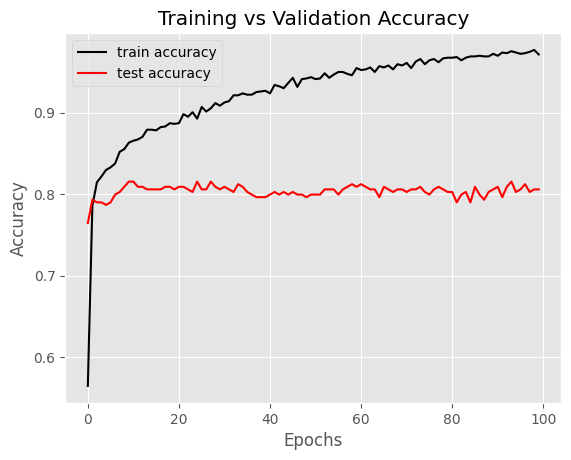

In [ ]:
# Validation with visualisation

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(np.arange(0,100), hist.history['accuracy'], label='train accuracy', color='black')
plt.plot(np.arange(0,100), hist.history['val_accuracy'], label='test accuracy', color='red')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

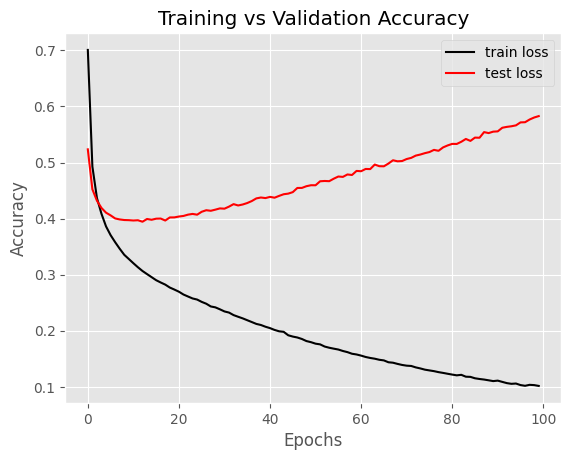

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(np.arange(0,100), hist.history['loss'], label='train loss', color='black')
plt.plot(np.arange(0,100), hist.history['val_loss'], label='test loss', color='red')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()